# Grabcut


In [1]:
(ns homeless-dusk
 (:require
  [opencv4.core :refer :all]
  [opencv4.colors.rgb :as rgb]
  [opencv4.utils :as u]))

nil

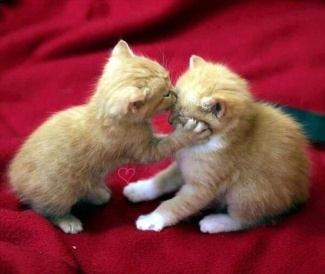

In [2]:
(def source "resources/chapter04/ai6.jpg")
(def org (-> source imread (u/resize-by 0.5)))
(def img (-> org clone))
(u/>>> img)

In [3]:
(def mask (new-mat))
(def rect (new-rect (new-point 10 10) (new-size (- (.width img) 30) (- (.height img) 30 ))))
(grab-cut img mask rect (new-mat) (new-mat) 7 GC_INIT_WITH_RECT)

nil

In [4]:
(dump (submat mask (new-rect (new-point 150 150) (new-size 5 5))))

[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]
[3 3 3 3 3]


nil

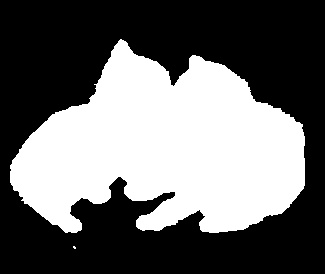

In [5]:
(def fg-mask (clone mask))
(def source1 (new-mat 1 1 CV_8U (new-scalar 3.0)))
(compare mask source1 fg-mask CMP_EQ)
(u/>>> fg-mask)

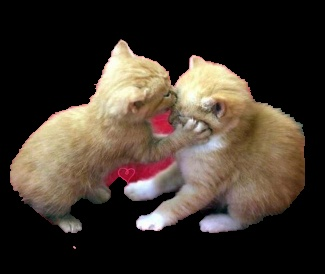

In [6]:
(def fg_foreground (-> img (u/mat-from)  (set-to rgb/black)))
(copy-to img fg_foreground fg-mask)
(u/>>> fg_foreground)

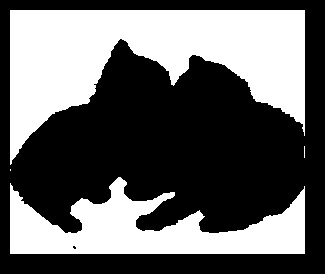

In [7]:
(def bg-mask (clone mask))
(def source2 (new-mat 1 1 CV_8U (new-scalar 2.0)))
(compare mask source2 bg-mask CMP_EQ)
(u/>>> bg-mask)

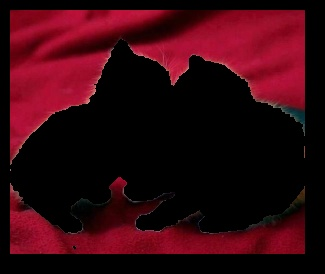

In [8]:
(def bg_foreground (-> img (u/mat-from)  (set-to (new-scalar 0 0 0))))
(copy-to img bg_foreground bg-mask)
(u/>>> bg_foreground)

### on a stream

In [9]:
(defn in-front-slow [buffer]  
  (let [ 
        img (clone buffer)
        rect (new-rect (new-point 5 5) (new-size (- (.width buffer) 5) (- (.height buffer) 5 )))
        mask (new-mat)
        pfg-mask (new-mat)
        source1 (new-mat 1 1 CV_8U (new-scalar 3.0))
        pfg_foreground (-> buffer (u/mat-from)  (set-to (new-scalar 0 0 0)))]
   
    (grab-cut img mask rect (new-mat) (new-mat) 7 GC_INIT_WITH_RECT)
    (compare mask source1 pfg-mask CMP_EQ)
    (copy-to buffer pfg_foreground pfg-mask)
    pfg_foreground))

#'homeless-dusk/in-front-slow

_The code below requires a camera, and will only work if you have the jupyter notebook running locally on your machine_ 

_Uncomment as required_

In [11]:
; (u/simple-cam-window in-front-slow)